# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)
# Потом в будущем используем, как на занятии, но пока вручную
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
!pip install ydata_profiling
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Нам нужно зафиксировать случайность для послеждующей воспроизводимости результатов.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [3]:
# 30 случайных строк тренировочного датасета

df_train.head(30)

name  year  selling_price  km_driven  \
0                 Maruti Swift Dzire VDI  2014         450000     145500   
1           Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Hyundai i20 Sportz Diesel  2010         225000     127000   
3                 Maruti Swift VXI BSIII  2007         130000     120000   
4          Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
5           Maruti Wagon R LXI DUO BSIII  2007          96000     175000   
6                     Maruti 800 DX BSII  2001          45000       5000   
7                       Toyota Etios VXD  2011         350000      90000   
8   Ford Figo Diesel Celebration Edition  2013         200000     169000   
9        Renault Duster 110PS Diesel RxL  2014         500000      68000   
10                         Maruti Zen LX  2005          92000     100000   
11                Maruti Swift Dzire VDi  2009         280000     140000   
12                  Maruti Swift 1.3 VXi  2007         200000      80000   
13              Maruti Wagon R LXI Minor  2009         180000      90000   
14  Mahindra KUV 100 mFALCON G80 K8 5str  2016         400000      40000   
15             Hyundai i20 1.4 CRDi Asta  2012         500000      53000   
16                        Maruti Alto LX  2002         150000      80000   
17   Hyundai i20 2015-2017 Asta 1.4 CRDi  2016         680000     100000   
18          Mahindra Verito 1.5 D4 BSIII  2011         174000     100000   
19                  Honda WR-V i-DTEC VX  2017         950000      50000   
20                Maruti Swift Dzire ZDI  2015         525000      40000   
21                        Maruti SX4 ZDI  2012         600000      72000   
22               Maruti Baleno Delta 1.2  2016         575000      45000   
23                   Maruti Alto 800 LXI  2017         275000      28000   
24     Chevrolet Enjoy TCDi LTZ 7 Seater  2013         300000      70000   
25              Maruti Wagon R LXI Minor  2009         220000     120000   
26           Maruti Omni E MPI STD BS IV  2018         254999      25000   
27       Maruti Vitara Brezza LDi Option  2017         670000      70000   
28                    Fiat Palio 1.2 ELX  2003          70000      50000   
29             Maruti Omni 8 Seater BSIV  2012         150000      35000   

      fuel seller_type transmission         owner     mileage   engine  \
0   Diesel  Individual       Manual   First Owner   23.4 kmpl  1248 CC   
1   Diesel  Individual       Manual  Second Owner  21.14 kmpl  1498 CC   
2   Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
3   Petrol  Individual       Manual   First Owner   16.1 kmpl  1298 CC   
4   Petrol  Individual       Manual   First Owner  20.14 kmpl  1197 CC   
5      LPG  Individual       Manual   First Owner  17.3 km/kg  1061 CC   
6   Petrol  Individual       Manual  Second Owner   16.1 kmpl   796 CC   
7   Diesel  Individual       Manual   First Owner  23.59 kmpl  1364 CC   
8   Diesel  Individual       Manual   First Owner   20.0 kmpl  1399 CC   
9   Diesel  Individual       Manual  Second Owner  19.01 kmpl  1461 CC   
10  Petrol  Individual       Manual  Second Owner   17.3 kmpl   993 CC   
11  Diesel  Individual       Manual  Second Owner   19.3 kmpl  1248 CC   
12  Petrol  Individual       Manual  Second Owner         NaN      NaN   
13  Petrol  Individual       Manual  Second Owner   18.9 kmpl  1061 CC   
14  Petrol  Individual       Manual   First Owner  18.15 kmpl  1198 CC   
15  Diesel  Individual       Manual  Second Owner   23.0 kmpl  1396 CC   
16  Petrol  Individual       Manual  Second Owner   19.7 kmpl   796 CC   
17  Diesel  Individual       Manual   First Owner  22.54 kmpl  1396 CC   
18  Diesel  Individual       Manual  Second Owner   21.0 kmpl  1461 CC   
19  Diesel  Individual       Manual   First Owner   25.5 kmpl  1498 CC   
20  Diesel  Individual       Manual   First Owner  26.59 kmpl  1248 CC   
21  Diesel  Individual       Manual   First Owner  

In [4]:
#  первые 5 и последние 5 объектов тестового датасета

pd.concat([df_test.head(5), df_test.tail(5)])

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0

In [5]:
#есть ли в датасете пропуски?

tmp_df = pd.concat([df_train, df_test],ignore_index=True)

tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7999 non-null   object 
 1   year           7999 non-null   int64  
 2   selling_price  7999 non-null   int64  
 3   km_driven      7999 non-null   int64  
 4   fuel           7999 non-null   object 
 5   seller_type    7999 non-null   object 
 6   transmission   7999 non-null   object 
 7   owner          7999 non-null   object 
 8   mileage        7778 non-null   object 
 9   engine         7778 non-null   object 
 10  max_power      7784 non-null   object 
 11  torque         7777 non-null   object 
 12  seats          7778 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 812.5+ KB


In [6]:
# Да, пропуски есть. Ниже - очевидные
# Вы вести их оказалось,сложнее, чем просто увидеть глазами

tmp_df.isnull().any()[tmp_df.isnull().any()].index.tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [7]:
# есть ли в данных явные дубликаты?

tmp_df.duplicated().sum()

np.int64(1170)

In [8]:
tmp_df[tmp_df.duplicated(keep=False)].head(20)

name  year  selling_price  \
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
30                    Maruti Vitara Brezza LDi  2017         650000   
31            Maruti Alto 800 CNG LXI Optional  2019         330000   
32                  Maruti Alto K10 VXI Airbag  2019         366000   
33            Hyundai Verna VTVT 1.6 SX Option  2019        1149000   
35                Tata Safari DICOR 2.2 LX 4x2  2011         425000   
36                              Maruti 800 Std  2012         150000   
37          Jeep Compass 1.4 Limited Plus BSIV  2019        2100000   
38                        Honda City i VTEC VX  2018         925000   
72   Ford EcoSport 1.5 TDCi Titanium Plus BSIV  2015         610000   
73                      BMW X1 sDrive20i xLine  2016        2500000   
74                  Maruti Celerio ZXI MT BSIV  2017         484999   
75                          Datsun GO A Petrol  2016         275000   
76                    Maruti Alto 800 VXI BSIV  2016         315000   
77                    Maruti Alto 800 LXI BSIV  2016         275000   
116                       Honda Amaze S i-VTEC  2019         690000   
117                 Audi Q5 35TDI Premium Plus  2018        3975000   
118                              Lexus ES 300h  2019        5150000   
119             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   

     km_driven    fuel seller_type transmission         owner      mileage  \
28       50000  Petrol  Individual       Manual  Second Owner          NaN   
29       35000  Petrol  Individual       Manual  Second Owner    14.0 kmpl   
30       16200  Diesel  Individual       Manual   First Owner    24.3 kmpl   
31       10000     CNG  Individual       Manual  Second Owner  33.44 km/kg   
32       15000  Petrol  Individual       Manual   First Owner   23.95 kmpl   
33        5000  Petrol  Individual       Manual   First Owner    17.0 kmpl   
35       60000  Diesel  Individual       Manual  Second Owner   13.93 kmpl   
36       76000  Petrol  Individual       Manual   First Owner    16.1 kmpl   
37        5000  Petrol  Individual    Automatic   First Owner    16.0 kmpl   
38       28900  Petrol      Dealer       Manual   First Owner    17.8 kmpl   
72       90000  Diesel  Individual       Manual   First Owner   22.77 kmpl   
73       30000  Petrol  Individual    Automatic  Second Owner   15.71 kmpl   
74       10000  Petrol      Dealer       Manual   First Owner    23.1 kmpl   
75       49000  Petrol      Dealer       Manual   First Owner   19.02 kmpl   
76       32000  Petrol      Dealer       Manual   First Owner    24.7 kmpl   
77       38000  Petrol      Dealer       Manual   First Owner    24.7 kmpl   
116       1303  Petrol      Dealer       Manual   First Owner    17.8 kmpl   
117      31800  Diesel      Dealer    Automatic   First Owner   17.01 kmpl   
118      20000  Petrol      Dealer    Automatic   First Owner   22.37 kmpl   
119      45000  Diesel      Dealer    Automatic   First Owner   19.33 kmpl   

      engine   max_power               torque  seats  
28       NaN         NaN                  NaN    NaN  
29    796 CC      35 bhp      6.1kgm@ 3000rpm    5.0  
30   1248 CC    88.5 bhp       200Nm@ 1750rpm    5.0  
31    796 CC    40.3 bhp        60Nm@ 3500rpm    4.0  
32    998 CC    67.1 bhp        90Nm@ 3500rpm    5.0  
33   1591 CC   121.3 bhp       151Nm@ 4850rpm    5.0  
35   2179 CC  138.03 bhp  320Nm@ 1700-2700rpm    7.0  
36    796 CC      37 bhp        59Nm@ 2500rpm    4.0  
37   1368 CC  160.77 bhp  250Nm@ 1750-2500rpm    5.0  
38   1497 CC   117.3 bhp       145Nm@ 4600rpm    5.0  
72   1498 CC   98.59 bhp  205Nm@ 1750-3250rpm    5.0  
73   1998 CC     189 bhp  280Nm@ 1350-4600rpm    5.0  
74    998 CC   67.04 bhp        90Nm@ 3500rpm    5.0  
75   1198 CC   67.05 bhp       104Nm@ 4000rpm    5.0  
76    796 CC    47.3 bhp        69Nm@ 3500rpm    5.0  
77    796 CC    47.3 bhp       

 Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?


#### Можно сказать многое о датасете:
```
*   Это датасет по продаваемым или проданным подержанным машинам.
*   Целевая переменная - цена "selling_price"
*   Нужна предобработака данных, есть пропуски и дубликаты, есть данные в разных единицах измерения
```
#### А о чем нельзя?
```
*   Сколько пропусков и дубликатов. Надо сначала делать предобработку данных.
*   ['mileage', 'engine', 'max_power', 'torque', 'seats'] - надо переделывать для обработки пропусков
*   Пока неясно какие фичи  как явно влияют на целевую переменную

```


Достаточно ли метода duplicated для анализа дубликатов? Почему?

*   Метода примененного в лоб не достаточно, так как могут быть ошибки ввода, некоторые единицы измерения даны в разных единицах и нужно переводить. Если данные заполнены, это не значит, что если мы обработаем единицы измерения в ячейке что-то останется.





Первичные выводы: у нас есть данные с пропусками, числовые заданы как текст. Надо перевести для начала: mileage, engine	max_power	torque	seats	в числа.

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
# Не так-то просто тут все пропуски заполнить медианой. Начнем с mileage - тут разные единицы измерения и разная плотность у разного вида топлива.
# Все эксперименты будут на tmp_df, применить это правильно к трейну и тесту.
tmp_df[['mileage_value', 'mileage_unit']] = tmp_df['mileage'].str.split(' ', n=1, expand=True)

##### Эксперименты над данными я сверну, потому что здесь не очень аккуратно оформлено, но при необходимости можно будет развернуть и посмотреть как шла мысль.

In [10]:
tmp_df.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats mileage_value mileage_unit  
0            190Nm@ 2000rpm    5.0          23.4         kmpl  
1       250Nm@ 1500-2500rpm    5.0         21.14         kmpl  
2  22.4 kgm at 1750-2750rpm    5.0          23.0         kmpl  
3     11.5@ 4,500(kgm@ rpm)    5.0          16.1         kmpl  
4         113.75nm@ 4000rpm    5.0         20.14         kmpl

In [11]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7999 non-null   object 
 1   year           7999 non-null   int64  
 2   selling_price  7999 non-null   int64  
 3   km_driven      7999 non-null   int64  
 4   fuel           7999 non-null   object 
 5   seller_type    7999 non-null   object 
 6   transmission   7999 non-null   object 
 7   owner          7999 non-null   object 
 8   mileage        7778 non-null   object 
 9   engine         7778 non-null   object 
 10  max_power      7784 non-null   object 
 11  torque         7777 non-null   object 
 12  seats          7778 non-null   float64
 13  mileage_value  7778 non-null   object 
 14  mileage_unit   7778 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 937.5+ KB


In [12]:
tmp_df['mileage_value'] = pd.to_numeric(tmp_df['mileage_value'], errors='coerce')

In [13]:
tmp_df['mileage_unit'].value_counts()

mileage_unit
kmpl     7690
km/kg      88
Name: count, dtype: int64

In [14]:
tmp_df.groupby('fuel')['mileage_unit'].value_counts()

fuel    mileage_unit
CNG     km/kg             53
Diesel  kmpl            4224
LPG     km/kg             35
Petrol  kmpl            3466
Name: count, dtype: int64

In [15]:
tmp_df.describe()

year  selling_price     km_driven        seats  mileage_value
count  7999.000000   7.999000e+03  7.999000e+03  7778.000000    7778.000000
mean   2013.801225   6.368131e+05  6.981073e+04     5.417974      19.415455
std       4.048004   8.028019e+05  5.665201e+04     0.960059       4.038547
min    1983.000000   2.999900e+04  1.000000e+00     2.000000       0.000000
25%    2011.000000   2.534995e+05  3.500000e+04     5.000000      16.780000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000      19.300000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000      22.320000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000      42.000000

In [16]:
# Итог - написали функцию для перевода

def mileage_to_kmpl(df):
    mileage_val = pd.to_numeric(df['mileage'].str.split(' ', n=1, expand=True)[0], errors='coerce')
    df = df.copy()
    df['mileage_kmpl'] = np.where(df['fuel'].isin(['CNG', 'LPG']),
                                  mileage_val * 0.7,
                                  mileage_val)
    return df.drop(columns='mileage')

In [17]:
# Теперь рассмотрим engine

tmp_df[['engine_value', 'engine_unit']] = tmp_df['engine'].str.split(' ', n=1, expand=True)

In [18]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7999 non-null   object 
 1   year           7999 non-null   int64  
 2   selling_price  7999 non-null   int64  
 3   km_driven      7999 non-null   int64  
 4   fuel           7999 non-null   object 
 5   seller_type    7999 non-null   object 
 6   transmission   7999 non-null   object 
 7   owner          7999 non-null   object 
 8   mileage        7778 non-null   object 
 9   engine         7778 non-null   object 
 10  max_power      7784 non-null   object 
 11  torque         7777 non-null   object 
 12  seats          7778 non-null   float64
 13  mileage_value  7778 non-null   float64
 14  mileage_unit   7778 non-null   object 
 15  engine_value   7778 non-null   object 
 16  engine_unit    7778 non-null   object 
dtypes: float64(2), int64(3), object(12)
memory usage: 1.

In [19]:
tmp_df['engine_value'] = pd.to_numeric(tmp_df['engine_value'], errors='coerce')

In [20]:
tmp_df['engine_unit'].value_counts()

engine_unit
CC    7778
Name: count, dtype: int64

In [21]:
tmp_df.describe()

year  selling_price     km_driven        seats  mileage_value  \
count  7999.000000   7.999000e+03  7.999000e+03  7778.000000    7778.000000   
mean   2013.801225   6.368131e+05  6.981073e+04     5.417974      19.415455   
std       4.048004   8.028019e+05  5.665201e+04     0.960059       4.038547   
min    1983.000000   2.999900e+04  1.000000e+00     2.000000       0.000000   
25%    2011.000000   2.534995e+05  3.500000e+04     5.000000      16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000      19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000      22.320000   
max    2020.000000   1.000000e+07  2.360457e+06    14.000000      42.000000   

       engine_value  
count   7778.000000  
mean    1458.397274  
std      504.376331  
min      624.000000  
25%     1197.000000  
50%     1248.000000  
75%     1582.000000  
max     3604.000000

In [22]:
# Итог - написали функцию для перевода

def engine_to_num(df):
    df = df.copy()
    df['engine_cc'] = pd.to_numeric(df['engine'].str.split(' ', n=1, expand=True)[0],errors='coerce').astype('Int64')
    return df.drop(columns='engine')

In [23]:
# Теперь рассмотрим max_power

tmp_df[['max_power_value', 'max_power_unit']] = tmp_df['max_power'].str.split(' ', n=1, expand=True)

In [24]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7999 non-null   object 
 1   year             7999 non-null   int64  
 2   selling_price    7999 non-null   int64  
 3   km_driven        7999 non-null   int64  
 4   fuel             7999 non-null   object 
 5   seller_type      7999 non-null   object 
 6   transmission     7999 non-null   object 
 7   owner            7999 non-null   object 
 8   mileage          7778 non-null   object 
 9   engine           7778 non-null   object 
 10  max_power        7784 non-null   object 
 11  torque           7777 non-null   object 
 12  seats            7778 non-null   float64
 13  mileage_value    7778 non-null   float64
 14  mileage_unit     7778 non-null   object 
 15  engine_value     7778 non-null   float64
 16  engine_unit      7778 non-null   object 
 17  max_power_valu

In [25]:
tmp_df['max_power_value'] = pd.to_numeric(tmp_df['max_power_value'], errors='coerce')

tmp_df.describe()

year  selling_price     km_driven        seats  mileage_value  \
count  7999.000000   7.999000e+03  7.999000e+03  7778.000000    7778.000000   
mean   2013.801225   6.368131e+05  6.981073e+04     5.417974      19.415455   
std       4.048004   8.028019e+05  5.665201e+04     0.960059       4.038547   
min    1983.000000   2.999900e+04  1.000000e+00     2.000000       0.000000   
25%    2011.000000   2.534995e+05  3.500000e+04     5.000000      16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000      19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000      22.320000   
max    2020.000000   1.000000e+07  2.360457e+06    14.000000      42.000000   

       engine_value  max_power_value  
count   7778.000000      7783.000000  
mean    1458.397274        91.438968  
std      504.376331        35.742906  
min      624.000000         0.000000  
25%     1197.000000        68.050000  
50%     1248.000000        82.000000  
75%     1582.000000       102.000000  
max     3604.000000       400.000000

In [26]:
tmp_df['max_power_unit'].value_counts()

max_power_unit
bhp    7778
Name: count, dtype: int64

In [27]:
# Итог - написали функцию для перевода

def max_power_to_num(df):
    df = df.copy()
    df['max_power_bhp'] = pd.to_numeric(df['max_power'].str.split(' ', n=1, expand=True)[0],errors='coerce')
    return df.drop(columns='max_power')

In [28]:
tmp_df[['torque_value', 'torque_unit']] = tmp_df['torque'].str.lower().str.extract(r'(\d+\.?\d*)\D*(nm|kgm)')

tmp_df['torque_value'] = pd.to_numeric(tmp_df['torque_value'], errors='coerce')

In [29]:
tmp_df['torque_unit'].value_counts()

torque_unit
nm     7268
kgm     497
Name: count, dtype: int64

In [30]:
# Написали функцию:

def torque_to_nm(df):
    torque_lower = df['torque'].str.lower()
    extracted = torque_lower.str.extract(r'(\d+\.?\d*)\D*(nm|kgm)')
    torque_val = pd.to_numeric(extracted[0], errors='coerce')
    torque_unit = extracted[1]

    df = df.copy()
    df['torque_nm'] = np.where(
        torque_unit == 'kgm',
        torque_val * 9.81,
        torque_val)
    return df.drop(columns='torque')

In [31]:
# Теперь рассмотрим # seats

def seats_to_int(df):
    df = df.copy()
    df['seats'] = pd.to_numeric(df['seats'], errors='coerce').astype('Int64')
    return df

In [32]:
def preprocess_df(df):
    df = df.copy()
    df = mileage_to_kmpl(df)
    df = engine_to_num(df)
    df = max_power_to_num(df)
    df = torque_to_nm(df)
    df = seats_to_int(df)
    return df

#### Результаты экспериментов

* Написаны фунции для преобразования данных и подготовке к замене пропусков.
* Эти функции можно применять для тренировочного и тестового датасетов



```
def preprocess_df(df):
    df = df.copy()
    df = mileage_to_kmpl(df)
    df = engine_to_num(df)
    df = max_power_to_num(df)
    df = torque_to_nm(df)
    df = seats_to_int(df)
    return df
```



In [33]:
# Применим препроцессинг к нашему временному датасету.
tmp_df = pd.concat([df_train, df_test],ignore_index=True)

tmp_df = preprocess_df(tmp_df)

In [34]:
# Проверим типы данных
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7999 non-null   object 
 1   year           7999 non-null   int64  
 2   selling_price  7999 non-null   int64  
 3   km_driven      7999 non-null   int64  
 4   fuel           7999 non-null   object 
 5   seller_type    7999 non-null   object 
 6   transmission   7999 non-null   object 
 7   owner          7999 non-null   object 
 8   seats          7778 non-null   Int64  
 9   mileage_kmpl   7778 non-null   float64
 10  engine_cc      7778 non-null   Int64  
 11  max_power_bhp  7783 non-null   float64
 12  torque_nm      7765 non-null   float64
dtypes: Int64(2), float64(3), int64(3), object(5)
memory usage: 828.2+ KB


In [35]:
# Ячейки с пропусками

missed_cols = tmp_df.isnull().any()[tmp_df.isnull().any()].index.tolist()

In [36]:
# Заполним пропуски
for col in missed_cols:
    tmp_df[col] = tmp_df[col].fillna(tmp_df[col].median())

In [37]:
profile_report = ProfileReport(tmp_df, title='Дашборд с заполненными пропусками')

profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 28.29it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Можно сделать много выводов, но оставим их для визуализации.
А так поддались предобработке, можно двигаться дальше и обрабатывать тренировочный тестовый датасеты

In [38]:
# Пока вручную
df_train = preprocess_df(df_train)

In [39]:
missed_cols = df_train.isnull().any()[df_train.isnull().any()].index.tolist()

In [40]:
# Посчитаем медианы на тестовом
median_seats = df_train.seats.median()
median_mileage_kmpl = df_train.mileage_kmpl.median()
median_engine_cc = df_train.engine_cc.median()
median_max_power_bhp = df_train.max_power_bhp.median()
median_torque_nm = df_train.torque_nm.median()

In [41]:
# Заменим
for col in missed_cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [42]:
# Проверим
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   seats          6999 non-null   Int64  
 9   mileage_kmpl   6999 non-null   float64
 10  engine_cc      6999 non-null   Int64  
 11  max_power_bhp  6999 non-null   float64
 12  torque_nm      6999 non-null   float64
dtypes: Int64(2), float64(3), int64(3), object(5)
memory usage: 724.6+ KB


In [43]:
# Предобработаем тестовый
df_test = preprocess_df(df_test)

In [44]:
missed_cols = df_test.isnull().any()[df_test.isnull().any()].index.tolist()

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   seats          981 non-null    Int64  
 9   mileage_kmpl   981 non-null    float64
 10  engine_cc      981 non-null    Int64  
 11  max_power_bhp  981 non-null    float64
 12  torque_nm      980 non-null    float64
dtypes: Int64(2), float64(3), int64(3), object(5)
memory usage: 103.6+ KB


In [46]:
# Заменим явно на тестовом пропуски данными с тренировочного
df_test.seats = df_test.seats.fillna(median_seats)
df_test.mileage_kmpl = df_test.mileage_kmpl.fillna(median_mileage_kmpl)
df_test.engine_cc = df_test.engine_cc.fillna(median_engine_cc)
df_test.max_power_bhp = df_test.max_power_bhp.fillna(median_max_power_bhp)
df_test.torque_nm = df_test.torque_nm.fillna(median_torque_nm)

In [47]:
# Проверим, что пропусков не осталось
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   seats          1000 non-null   Int64  
 9   mileage_kmpl   1000 non-null   float64
 10  engine_cc      1000 non-null   Int64  
 11  max_power_bhp  1000 non-null   float64
 12  torque_nm      1000 non-null   float64
dtypes: Int64(2), float64(3), int64(3), object(5)
memory usage: 103.6+ KB


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [48]:
# бъекты с одинаковым признаковым описанием и из количество
cols = df_train.columns.drop('selling_price')
duplicates = df_train.duplicated(subset=cols, keep=False)
duplicates.sum()

np.int64(1799)

In [49]:
# Отображение дублей
df_train[duplicates].sort_values(by=list(cols))

name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner  seats  mileage_kmpl  \
1703  Diesel      Dealer    Automatic  First Owner      5         15.73   
6307  Diesel      Dealer    Automatic  First Owner      5         15.73   
1836  Diesel  Individual    Automatic  First Owner      5         13.22   
6704  Diesel  Individual    Automatic  First Owner      5         13.22   
117   Diesel      Dealer    Automatic  First Owner      5         17.01   
...      ...         ...          ...          ...    ...           ...   
5637  Diesel  Individual    Automatic  First Owner      5         18.00   
5652  Diesel  Individual    Automatic  First Owner      5         18.00   
5753  Diesel  Individual    Automatic  First Owner      5         18.00   
5991  Diesel  Individual    Automatic  First Owner      5         18.00   
6778  Diesel  Individual    Automatic  First Owner      5         18.00   

      engine_cc  max_power_bhp  torque_nm  
1703       1968         174.33      380.0  
6307       1968         174.33      380.0  
1836       2967         241.40      580.0  
6704       2967         241.40      580.0  
117        1968         188.00      400.0  
...         ...            ...        ...  
5637       1969         190.00      400.0  
5652       1969         190.00      400.0  
5753       1969         190.00      400.0  
5991       1969         190.00      400.0  
6778       1969         190.00      400.0  

[1799 rows x 13 columns]

In [50]:
# Удаление дублей и обновление индексов
df_train = df_train.drop_duplicates(subset=cols, keep='first')

df_train = df_train.reset_index(drop=True)

In [51]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [52]:
# Я уже это сделал на предыдущем этапе. Крутящий момент не буду удалять, я сам себе злобный буратино не читал, что будет дальше.
df_train[['mileage_kmpl', 'engine_cc', 'max_power_bhp','torque_nm']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mileage_kmpl   5840 non-null   float64
 1   engine_cc      5840 non-null   Int64  
 2   max_power_bhp  5840 non-null   float64
 3   torque_nm      5840 non-null   float64
dtypes: Int64(1), float64(3)
memory usage: 188.3 KB


In [53]:
# На тестовом то же саме. Позволю себе оставить engine_cc целочисленным.
df_test[['mileage_kmpl', 'engine_cc', 'max_power_bhp','torque_nm']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mileage_kmpl   1000 non-null   float64
 1   engine_cc      1000 non-null   Int64  
 2   max_power_bhp  1000 non-null   float64
 3   torque_nm      1000 non-null   float64
dtypes: Int64(1), float64(3)
memory usage: 32.4 KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [54]:
# Сделано
df_train[['seats','engine_cc']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   seats      5840 non-null   Int64
 1   engine_cc  5840 non-null   Int64
dtypes: Int64(2)
memory usage: 102.8 KB


In [55]:
# И тут тоже
df_train[['seats','engine_cc']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   seats      5840 non-null   Int64
 1   engine_cc  5840 non-null   Int64
dtypes: Int64(2)
memory usage: 102.8 KB


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [56]:
df_train.describe()

year  selling_price     km_driven     seats  mileage_kmpl  \
count  5840.000000   5.840000e+03  5.840000e+03    5840.0   5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04  5.426712     19.338922   
std       4.095622   5.354320e+05  6.007114e+04  0.982344      3.974559   
min    1983.000000   2.999900e+04  1.000000e+00       2.0      0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04       5.0     16.800000   
50%    2014.000000   4.050000e+05  7.000000e+04       5.0     19.200000   
75%    2017.000000   6.400000e+05  1.000000e+05       5.0     22.070000   
max    2020.000000   1.000000e+07  2.360457e+06      14.0     42.000000   

         engine_cc  max_power_bhp     torque_nm  
count       5840.0    5840.000000   5840.000000  
mean   1429.448973      87.910782    712.242527  
std     485.662834      31.639585   3582.809488  
min          624.0       0.000000      0.000000  
25%         1197.0      68.000000    111.800000  
50%         1248.0      81.860000    180.000000  
75%         1498.0      99.000000    215.000000  
max         3604.0     400.000000  33354.000000

In [57]:
df_test.describe()

year  selling_price      km_driven     seats  mileage_kmpl  \
count  1000.000000   1.000000e+03    1000.000000    1000.0   1000.000000   
mean   2013.681000   6.179010e+05   71393.341000     5.403     19.279483   
std       4.012149   7.585539e+05   48486.218662  0.912921      3.956192   
min    1995.000000   3.100000e+04    1303.000000       4.0      0.000000   
25%    2011.000000   2.500000e+05   37000.000000       5.0     16.500000   
50%    2014.000000   4.349990e+05   61500.000000       5.0     19.200000   
75%    2017.000000   6.700000e+05  100000.000000       5.0     22.300000   
max    2020.000000   6.000000e+06  375000.000000       9.0     28.400000   

       engine_cc  max_power_bhp     torque_nm  
count     1000.0    1000.000000   1000.000000  
mean    1454.876      90.844330    829.397714  
std    521.99574      34.892709   4179.400617  
min        624.0      34.200000      0.000000  
25%       1197.0      69.000000    111.775000  
50%       1248.0      82.425000    180.000000  
75%       1582.0     102.000000    219.700000  
max       3604.0     280.000000  33354.000000

Выводы по численным признакам:

*   Статитстики у тренировочного и тестового набора данных визуально не сильно отличаются, значит есть хорошие шансы на хорошие метрики

*   Нули в mileage_kmpl и torque_nm возможно потребуется чем-то заменить ведь их не может быть физически

*   Нужна будет стандартизация признаков, плюс при визуализации казалось, что распределение у цлевой переменной логнормальное. Возможно, нужно будет логарифмировать.

In [58]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [59]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

Выводы по нечисловым признакам:


*   Уникальных значений на тесте столько же, сколько в трейне по категориям.

*   Моды те же.

*   Текстовый признак name нужно будет предобработать дополнительно, а категориальные признаки закодировать.


In [60]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

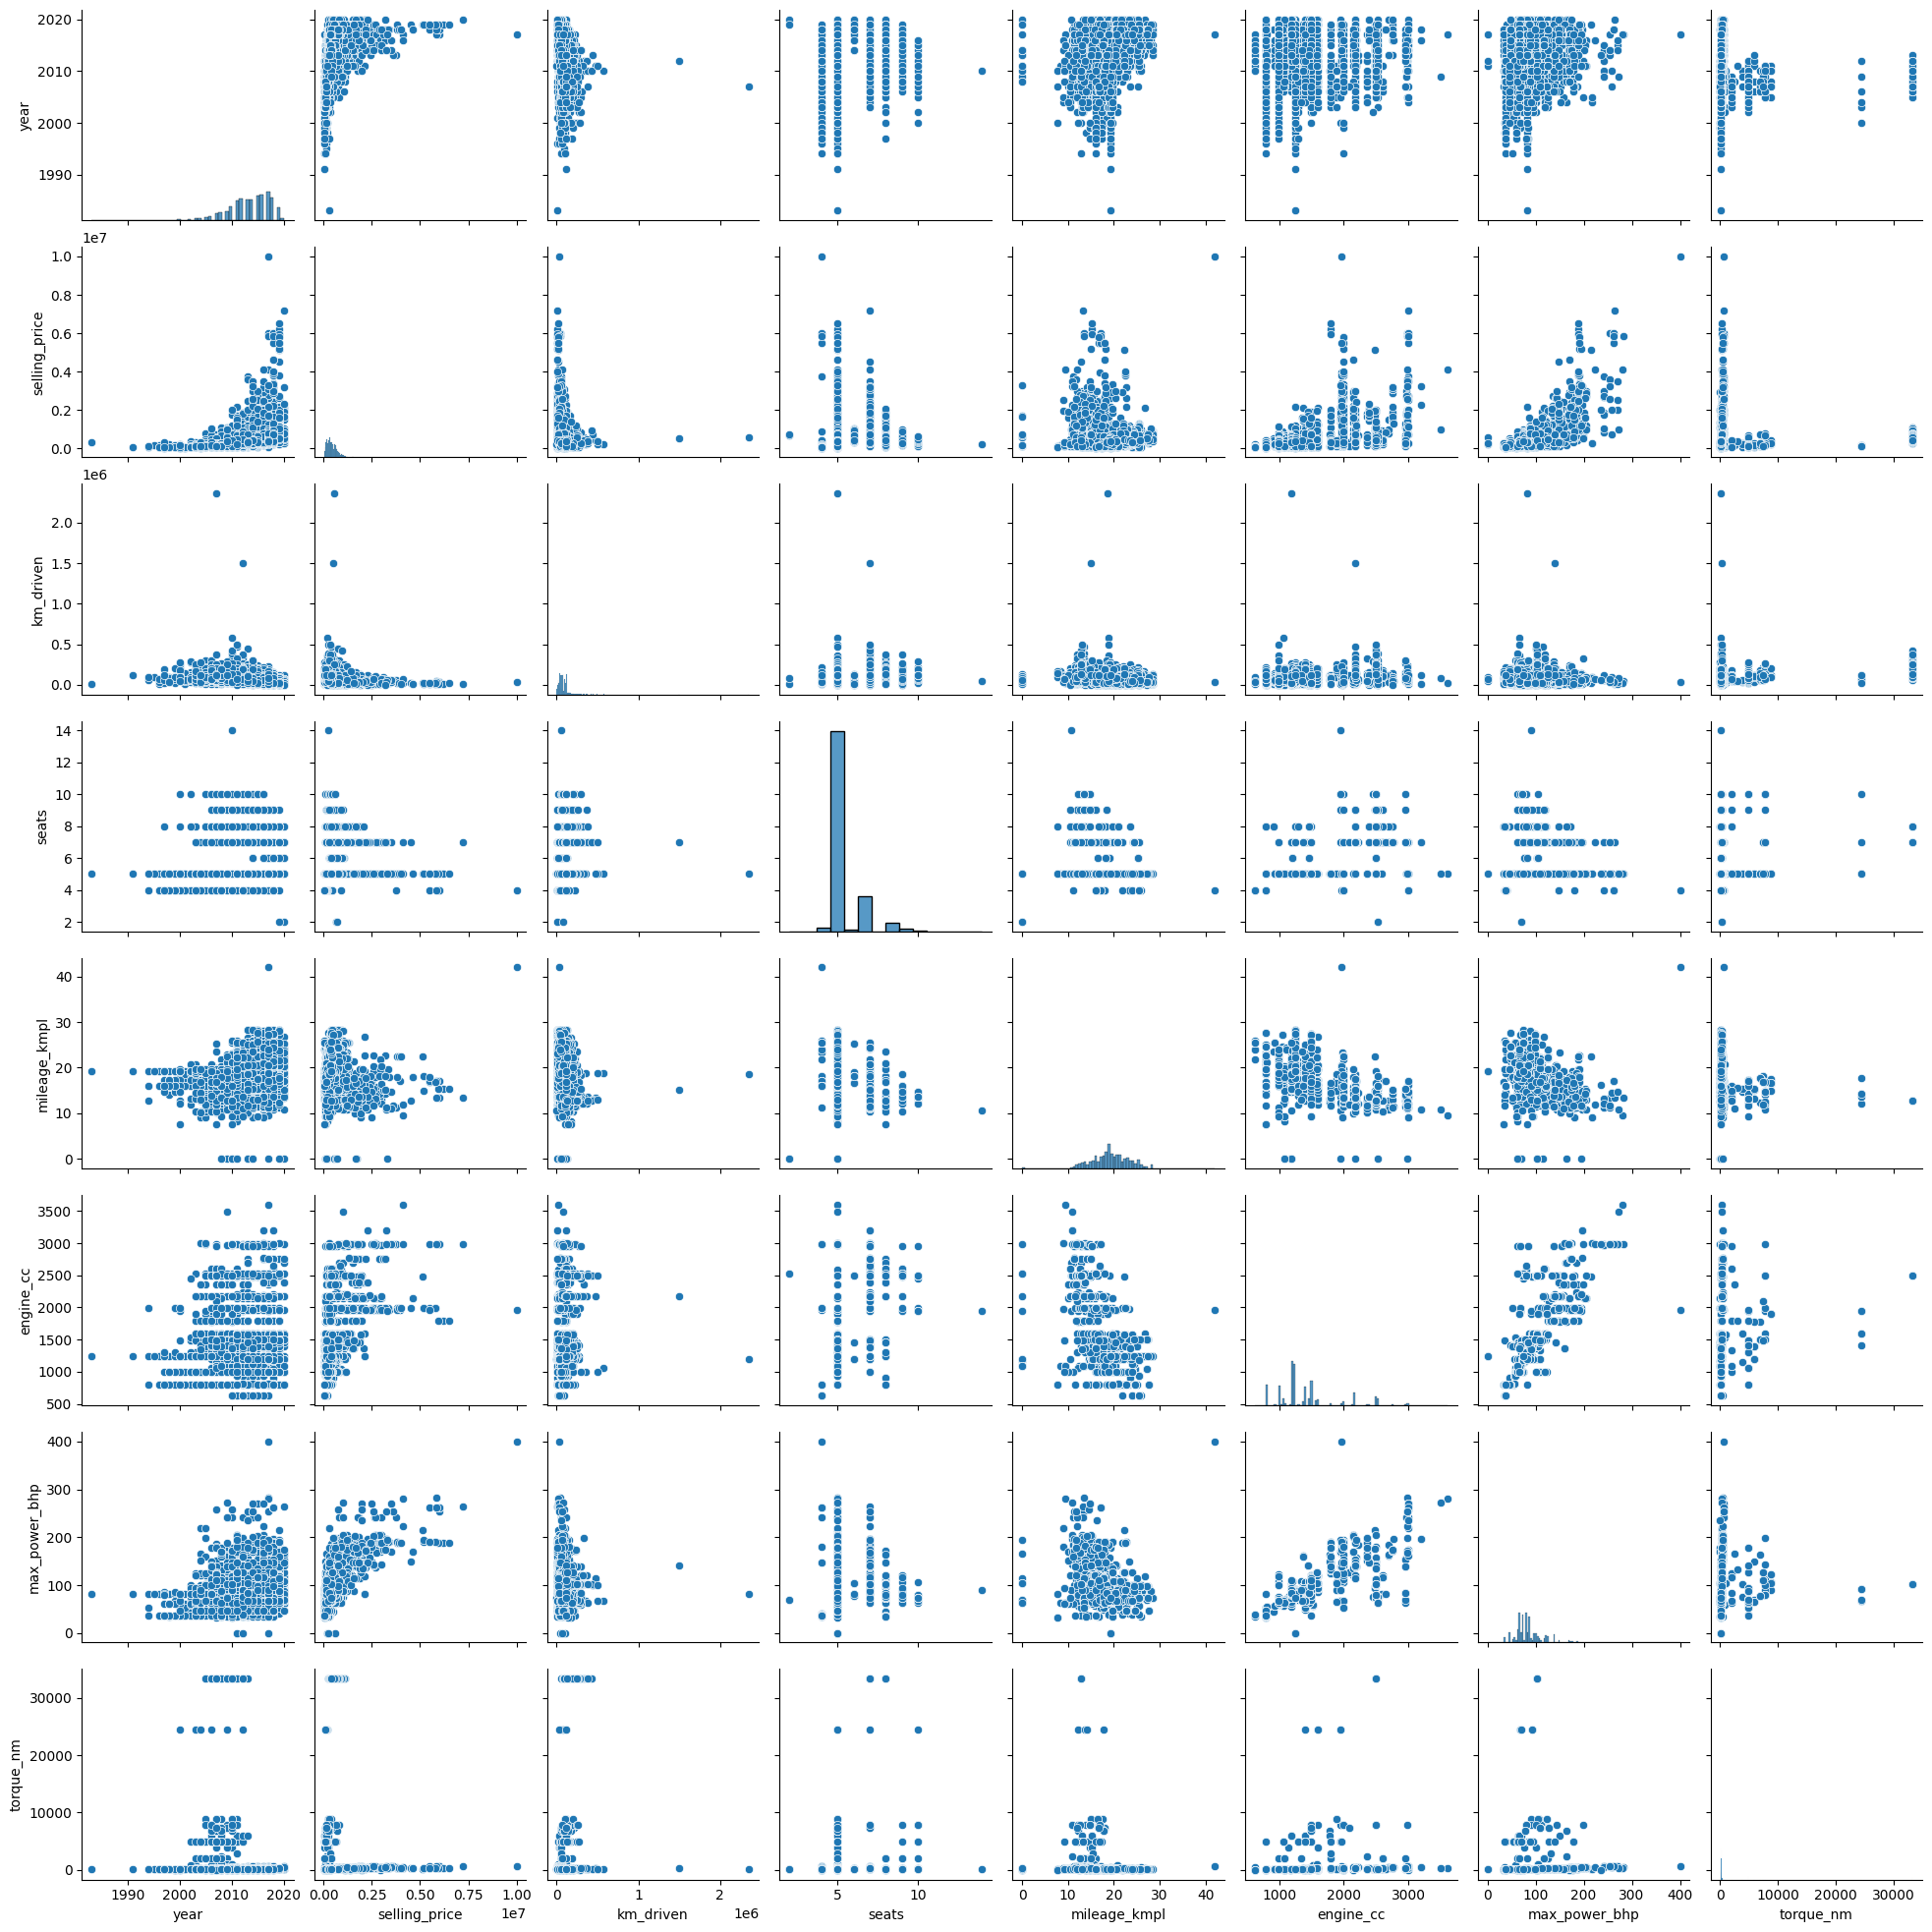

In [61]:
#  Построим график

sns.pairplot(df_train.select_dtypes(include='number'));

* - Можно ли предположить на основе распределений связь признаков с целевой переменной?*


*   Да, можно. Мощность двигателя и год выпуска визульно растут вместе с целью. А seats вообще категориальный признак.

 - *Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?*

 * Да, можно. Целевая переменная коррелирует положительно с годом выпуска, мощностью, и обрано коррелирует с пробегом.

 * Пробег коррелирует с годом выпуска, Мощность двигателя - с его объемом и крутящим моментом. Ни с чем визуально не коррелирует mileage (пробег на литр топлива)

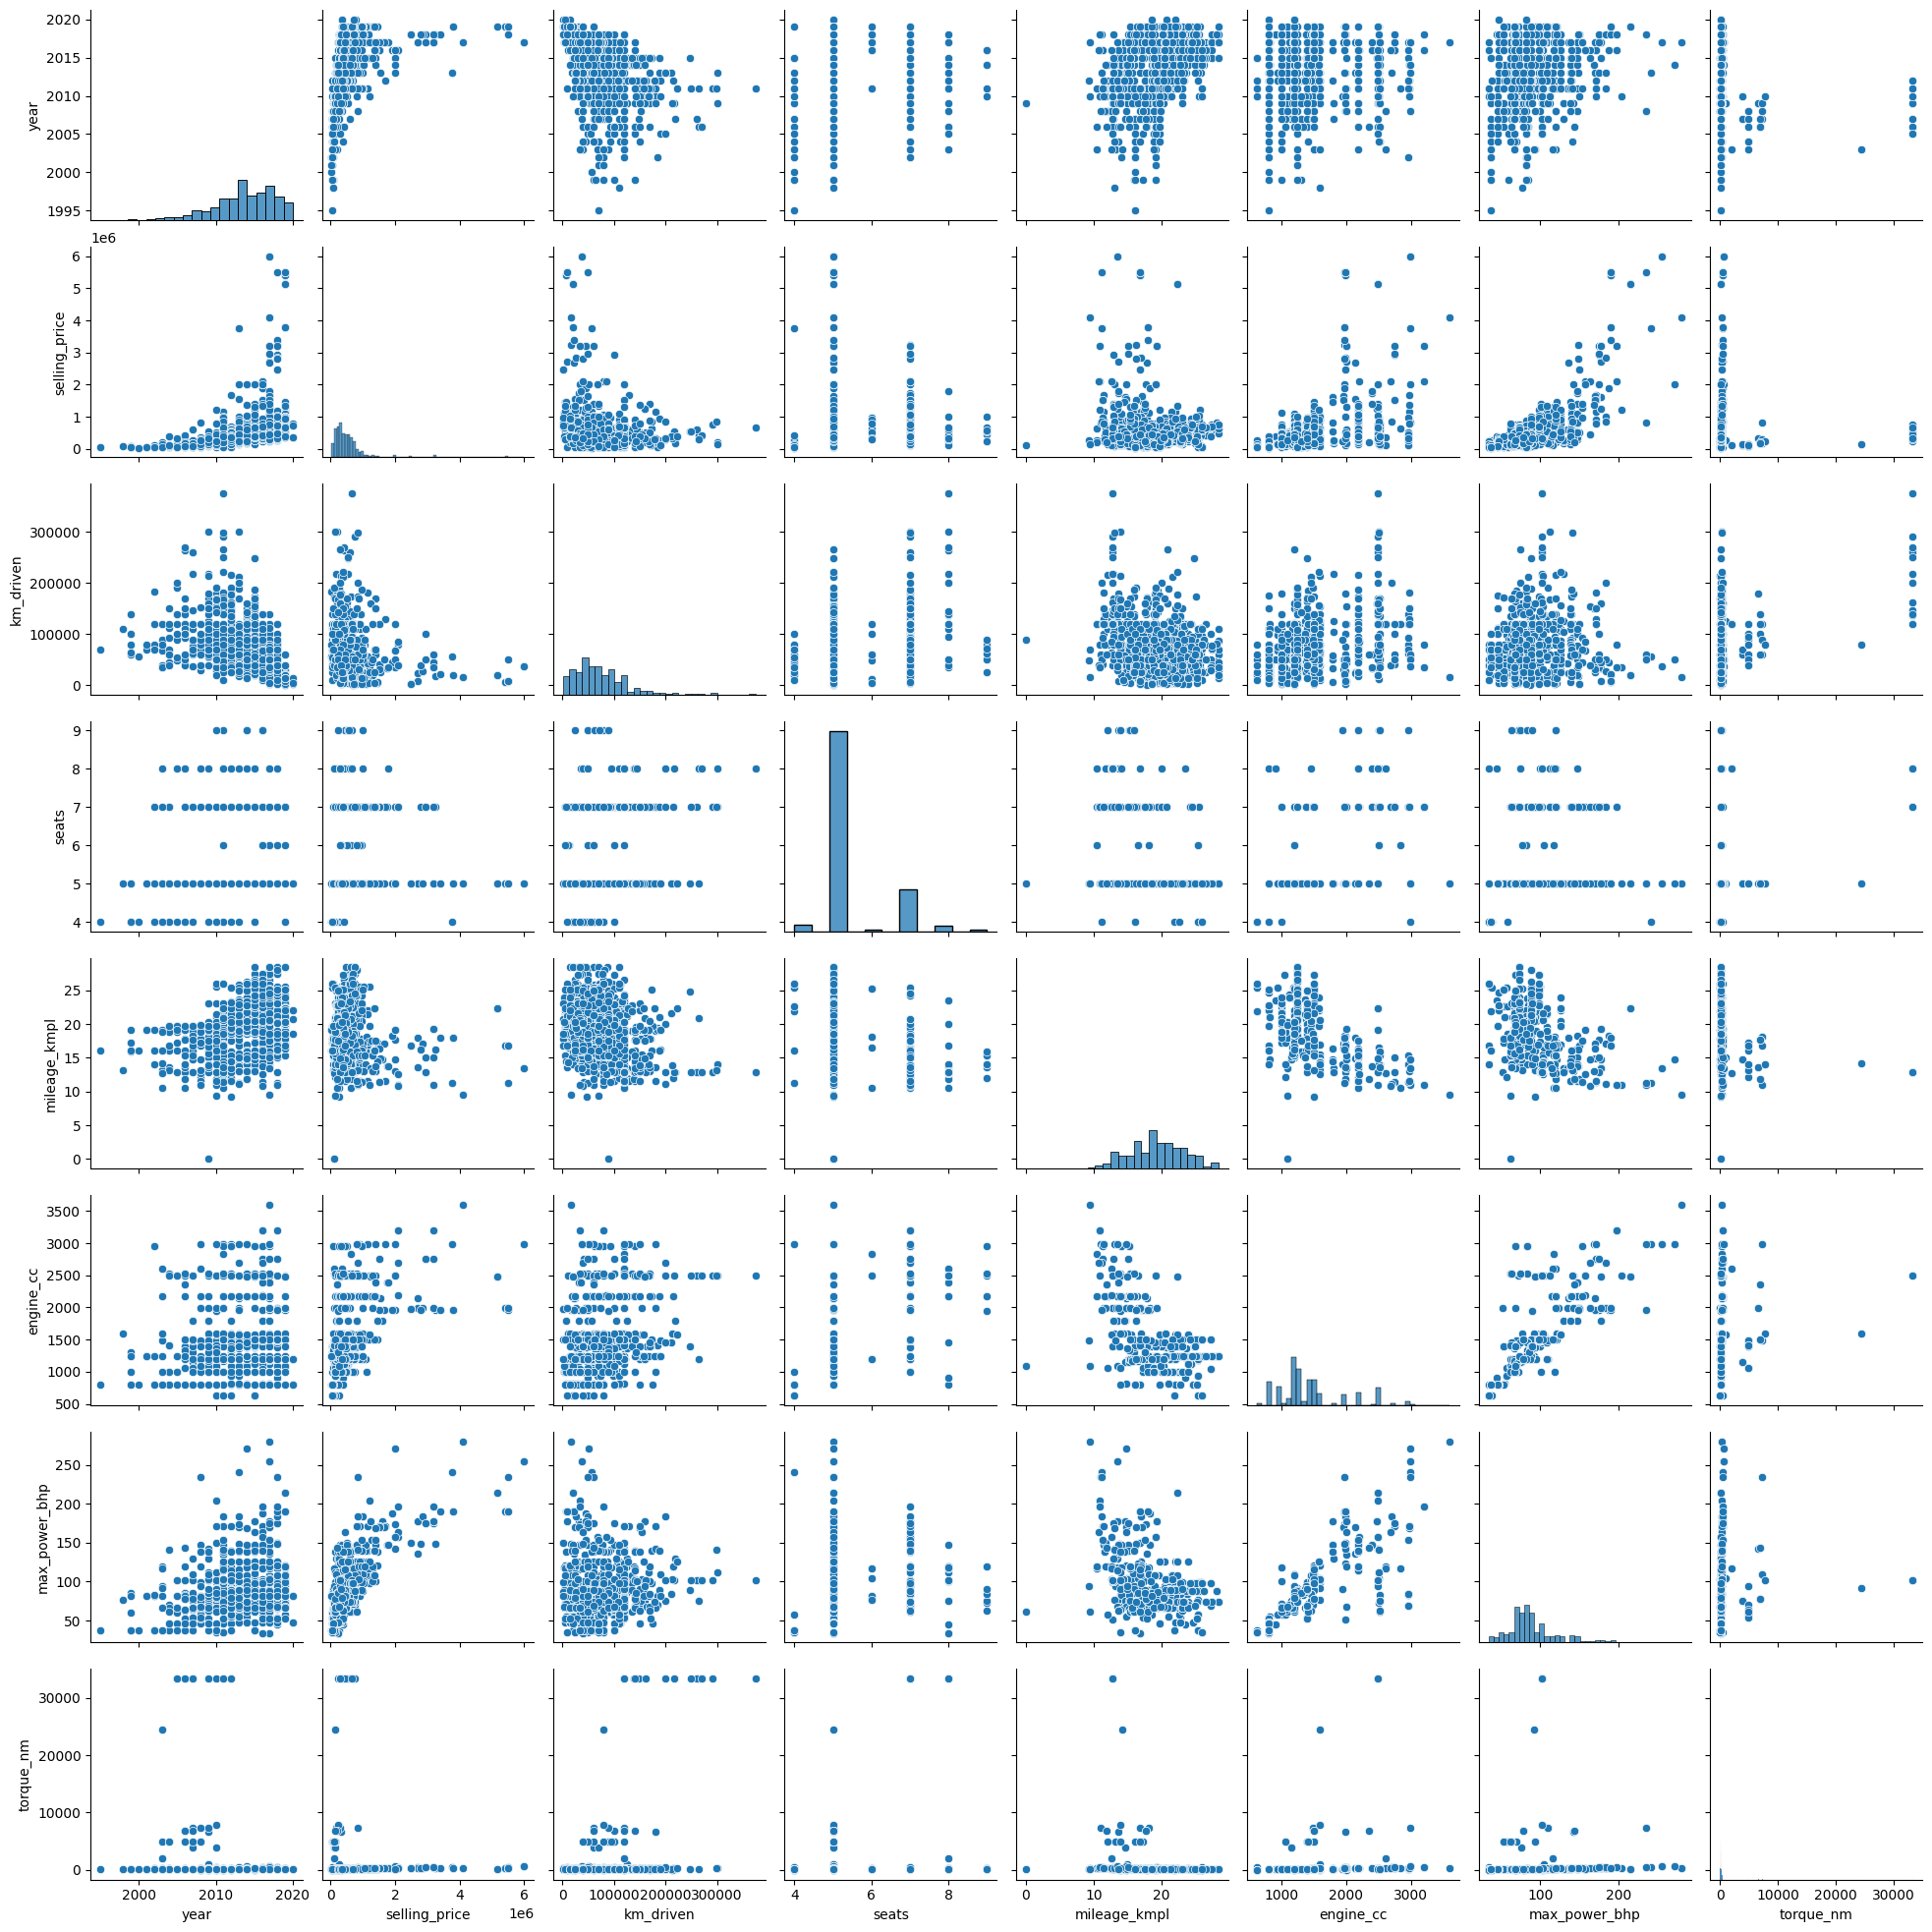

In [62]:
# pairplot по тестовым данным

sns.pairplot(df_test.select_dtypes(include='number'));

*Похожими ли оказались совокупности при разделении на трейн и тест?"*


Да, визаульно похожи, поэтому есть надежда на хорошие метрики качества

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


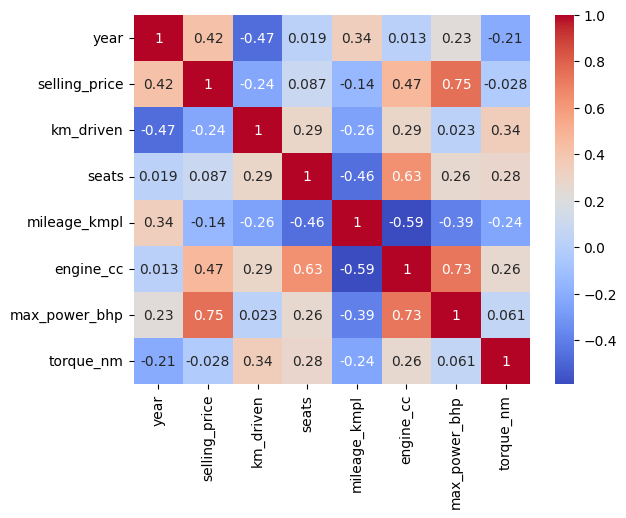

In [63]:
# В методе .corr() по умолчанию Пирсон. Сроим тепловую карту

sns.heatmap(df_test.select_dtypes(include='number').corr(), cmap = 'coolwarm', annot = True);

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

*   Меньше всего скоррелированы между собой объем двигателя(engine) и год выпуска (year) = 0.013 по Пирсону

*   Сильная положительяная линейная связь у цели (selling_price) и мощности двигателя(max_power), а также у мощности и объема двигателя

*   Да, можно утвержадать, что между годом выпуска и пробегом умеренная отрицательная корреляция -0.47


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

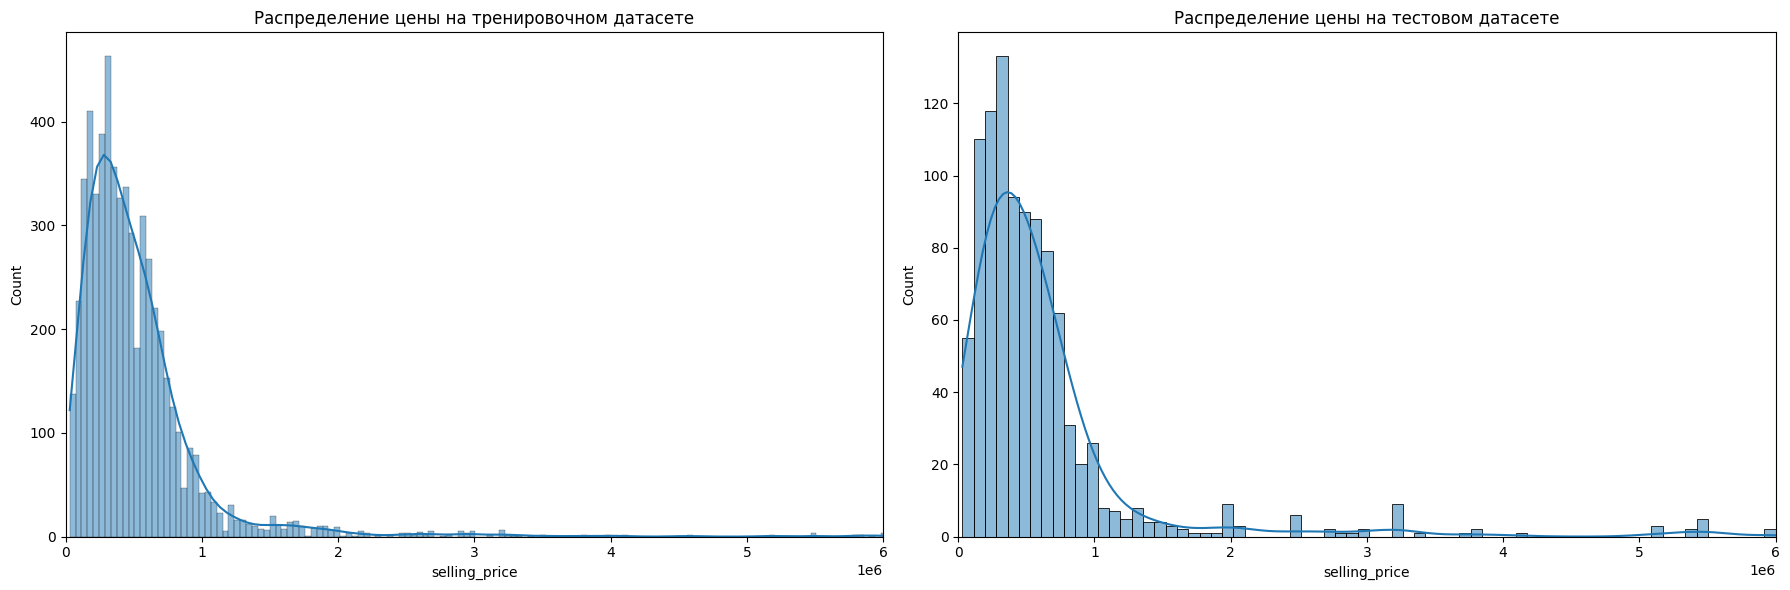

In [64]:
# Посторим график распределения целевой переменной

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=df_train, x='selling_price', ax=axes[0], kde=True)
axes[0].set_title('Распределение цены на тренировочном датасете')
axes[0].set_xlim(0, 0.6e07)

sns.histplot(data=df_test, x='selling_price', ax=axes[1], kde=True)
axes[1].set_title('Распределение цены на тестовом датасете')
axes[1].set_xlim(0, 0.6e07)

plt.tight_layout()
plt.show()

Вот наше предположение, что распределение логнормальное и подтвердилось.

In [65]:
# Возьмём логарифм от цены в обоих датасетах:

df_train['log_selling_price'] = np.log(df_train['selling_price'])
df_test['log_selling_price'] = np.log(df_test['selling_price'])

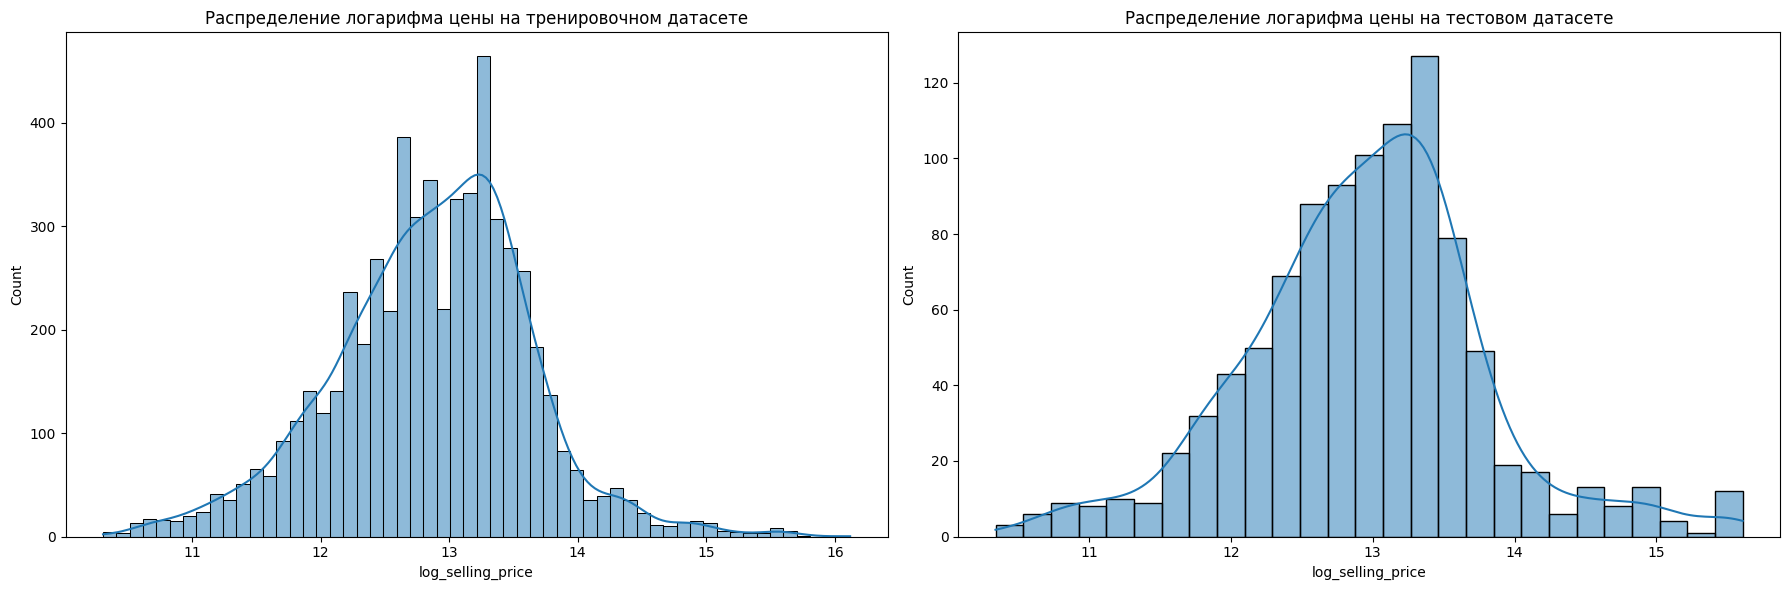

In [66]:
# Посторим график распределения логарифма целевой переменной

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=df_train, x='log_selling_price', ax=axes[0], kde=True)
axes[0].set_title('Распределение логарифма цены на тренировочном датасете')


sns.histplot(data=df_test, x='log_selling_price', ax=axes[1], kde=True)
axes[1].set_title('Распределение логарифма цены на тестовом датасете')

plt.tight_layout()
plt.show()

Вот это уже выглядит как нормальное распределение, которое нам и нужно для линейной регрессии

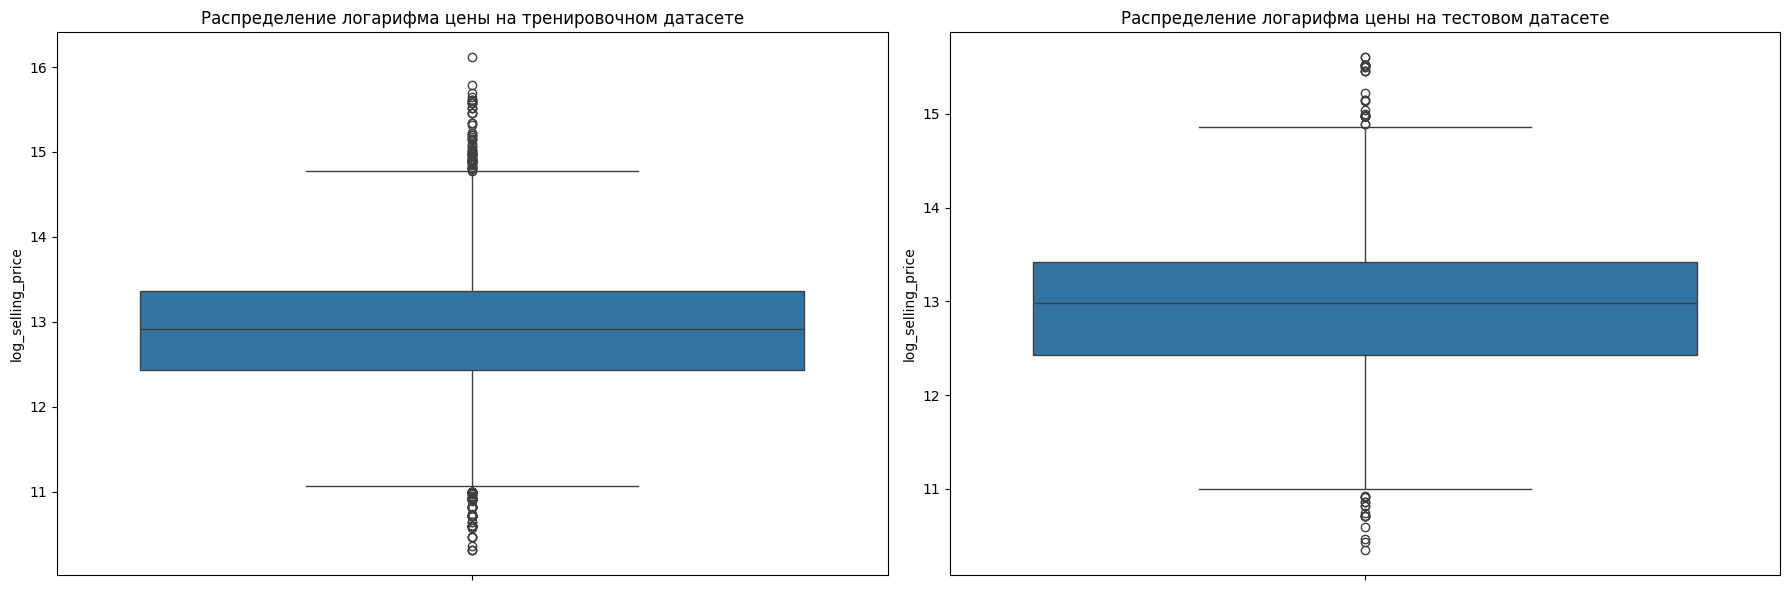

In [67]:
# Посторим яшики с усами

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=df_train, y='log_selling_price', ax=axes[0])
axes[0].set_title('Распределение логарифма цены на тренировочном датасете')


sns.boxplot(data=df_test, y='log_selling_price', ax=axes[1])
axes[1].set_title('Распределение логарифма цены на тестовом датасете')

plt.tight_layout()
plt.show()

В наличии в обоих случаях имеется немного смещенное вправо нормальное распределение и значения, выпадающие за усы - потенциальные выбросы. Датасет подходит для линейной регрессиии

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [68]:
num_features = ['year', 'km_driven', 'mileage_kmpl', 'engine_cc', 'max_power_bhp', 'torque_nm']
X_train = df_train[num_features].copy()
y_train = df_train['log_selling_price'].copy()

In [69]:
# опишите выбранные вещественные признаки
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   km_driven      5840 non-null   int64  
 2   mileage_kmpl   5840 non-null   float64
 3   engine_cc      5840 non-null   Int64  
 4   max_power_bhp  5840 non-null   float64
 5   torque_nm      5840 non-null   float64
dtypes: Int64(1), float64(3), int64(2)
memory usage: 279.6 KB


In [70]:
X_test = df_test[num_features].copy()
y_test = df_test['log_selling_price'].copy()

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [71]:
# Обучим линейную регрессию

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [72]:
# Посчитаем метрики
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = MSE(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
mse_test = MSE(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [73]:
# Выведем красиво:

print(f"На трейне MSE: {mse_train:.3f} | R^2: {r2_train:.3f}")
print(f"На тесте  MSE: {mse_test:.3f} | R^2: {r2_test:.3f}")

На трейне MSE: 0.102 | R^2: 0.825
На тесте  MSE: 0.099 | R^2: 0.861


Для старта - это очень хорошие метрики. Произошла какая-то магия и метрики на тесте лучше чем на трейне. Будем считать, что там меньше выбросов.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Обучим линейную регрессию

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [76]:
# Посчитаем метрики
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = MSE(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
mse_test = MSE(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [77]:
# Выведем красиво:

print(f"На трейне MSE: {mse_train:.3f} | R^2: {r2_train:.3f}")
print(f"На тесте  MSE: {mse_test:.3f} | R^2: {r2_test:.3f}")

На трейне MSE: 0.102 | R^2: 0.825
На тесте  MSE: 0.099 | R^2: 0.861


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [78]:
print(num_features)
print(model.coef_)

['year', 'km_driven', 'mileage_kmpl', 'engine_cc', 'max_power_bhp', 'torque_nm']
[ 0.46986566 -0.01501491  0.08138198  0.18560381  0.31493892  0.03517982]


Эта часть задания делается в цейтноте, тут уж не до красоты. Смотрим глазами и выбираем **year**

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [79]:
from sklearn.linear_model import Lasso

model = Lasso()

model.fit(X_train, y_train)

Lasso()

In [80]:
# Посчитаем метрики
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = MSE(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
mse_test = MSE(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [81]:
# Выведем красиво:

print(f"На трейне MSE: {mse_train:.3f} | R^2: {r2_train:.3f}")
print(f"На тесте  MSE: {mse_test:.3f} | R^2: {r2_test:.3f}")

На трейне MSE: 0.584 | R^2: 0.000
На тесте  MSE: 0.721 | R^2: -0.008


In [82]:
model.coef_

array([ 0., -0.,  0.,  0.,  0.,  0.])

Модель занулила все коэффиценты и предсказывает по сути константу. Очень интересное явление для меня

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [83]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}

model = Lasso(max_iter=1000)

gs = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error')

In [84]:
-gs.best_score_, gs.best_estimator_, gs.best_params_, gs.best_estimator_.coef_

(np.float64(0.10387049377953794),
 Lasso(alpha=0.01),
 {'alpha': 0.01},
 array([ 0.47162596, -0.00144438,  0.05780476,  0.16543015,  0.31047715,
         0.02292154]))

In [85]:
y_pred = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

mse_train = MSE(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
mse_test = MSE(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

*   грид-сёрч обучил 50 моделей
*   лучшийц коэффициент регуляризации 0.01 и почти занулился **km_driven**

In [86]:
# Выведем красиво:

print(f"На трейне MSE: {mse_train:.3f} | R^2: {r2_train:.3f}")
print(f"На тесте  MSE: {mse_test:.3f} | R^2: {r2_test:.3f}")

На трейне MSE: 0.103 | R^2: 0.823
На тесте  MSE: 0.102 | R^2: 0.858


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [87]:
from sklearn.linear_model import ElasticNet

params = {'alpha': [0.01, 0.1, 1.0, 10.0],
          'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}

model = ElasticNet(max_iter=1000)

gs = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [88]:
-gs.best_score_, gs.best_estimator_, gs.best_params_, gs.best_estimator_.coef_

(np.float64(0.10354668510631022),
 ElasticNet(alpha=0.01, l1_ratio=0.3),
 {'alpha': 0.01, 'l1_ratio': 0.3},
 array([ 0.46693491, -0.01207355,  0.07418537,  0.1798935 ,  0.31174694,
         0.03093245]))

In [89]:
y_pred = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

mse_train = MSE(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
mse_test = MSE(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [90]:
print(f"На трейне MSE: {mse_train:.3f} | R^2: {r2_train:.3f}")
print(f"На тесте  MSE: {mse_test:.3f} | R^2: {r2_test:.3f}")

На трейне MSE: 0.103 | R^2: 0.825
На тесте  MSE: 0.100 | R^2: 0.860


*   грид-сёрч обучил 240 моделей
*   лучшийе гиперпараметры 'alpha': 0.01, 'l1_ratio': 0.3

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [91]:
# Нет уж, пусть живет
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5840 non-null   object 
 1   year               5840 non-null   int64  
 2   selling_price      5840 non-null   int64  
 3   km_driven          5840 non-null   int64  
 4   fuel               5840 non-null   object 
 5   seller_type        5840 non-null   object 
 6   transmission       5840 non-null   object 
 7   owner              5840 non-null   object 
 8   seats              5840 non-null   Int64  
 9   mileage_kmpl       5840 non-null   float64
 10  engine_cc          5840 non-null   Int64  
 11  max_power_bhp      5840 non-null   float64
 12  torque_nm          5840 non-null   float64
 13  log_selling_price  5840 non-null   float64
dtypes: Int64(2), float64(4), int64(3), object(5)
memory usage: 650.3+ KB


In [92]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  seats  mileage_kmpl  engine_cc  \
0  Individual       Manual   First Owner      5         23.40       1248   
1  Individual       Manual  Second Owner      5         21.14       1498   
2  Individual       Manual   First Owner      5         23.00       1396   
3  Individual       Manual   First Owner      5         16.10       1298   
4  Individual       Manual   First Owner      5         20.14       1197   

   max_power_bhp  torque_nm  log_selling_price  
0          74.00    190.000          13.017003  
1         103.52    250.000          12.821258  
2          90.00    219.744          12.323856  
3          88.20   4905.000          11.775290  
4          81.86    113.750          12.994530

In [93]:
import os
os.makedirs('data', exist_ok=True)
df_train.to_csv('data/df_train_processed.csv', index=False)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [94]:
#assert X_train_cat.shape == (5840, 10)

In [95]:
from sklearn.preprocessing import TargetEncoder

num_features = ['year', 'km_driven', 'mileage_kmpl', 'engine_cc', 'max_power_bhp', 'torque_nm']
text_features = ['name']
cat_features = ['fuel',	'seller_type',	'transmission',	'owner', 'seats']
all = num_features + text_features + cat_features
X_train = df_train[all].copy()
y_train = df_train['log_selling_price'].copy()
X_test = df_test[all].copy()
y_test = df_test['log_selling_price'].copy()

In [96]:
text_encoder = TargetEncoder(target_type='continuous')
X_train[text_features] = text_encoder.fit_transform(X_train[['name']], y_train)
X_test[text_features]= text_encoder.transform(X_test[['name']])

In [97]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [98]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

one_hot_enc = OneHotEncoder( drop='first', handle_unknown='ignore', sparse_output=False)
X_train_one_hot =one_hot_enc.fit_transform(X_train[cat_features])
X_test_one_hot = one_hot_enc.transform(X_test[cat_features])


In [99]:
#  Тут я затупил, долго гуглил и попросил помочь LLM починить это все

#!!!! Ниже ячейка LLM

In [100]:
# 1. Получаем имена новых One-Hot колонок
onehot_columns = one_hot_enc.get_feature_names_out(cat_features)

# 2. Преобразуем массивы в DataFrame с теми же индексами
X_train_one_hot_df = pd.DataFrame(X_train_one_hot, columns=onehot_columns, index=X_train.index)
X_test_one_hot_df = pd.DataFrame(X_test_one_hot, columns=onehot_columns, index=X_test.index)

# 3. Удаляем старые категориальные колонки из исходных датафреймов
X_train_remaining = X_train.drop(columns=cat_features)
X_test_remaining = X_test.drop(columns=cat_features)

# 4. Объединяем оставшиеся признаки с One-Hot
X_train = pd.concat([X_train_remaining, X_train_one_hot_df], axis=1)
X_test= pd.concat([X_test_remaining, X_test_one_hot_df], axis=1)

In [101]:
# включили собственный мозг обратно:

X_train.shape


(5840, 25)

In [102]:
X_test.shape

(1000, 25)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [103]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

model = Ridge(max_iter=1000)

gs = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=1000),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [104]:
-gs.best_score_, gs.best_estimator_, gs.best_params_, gs.best_estimator_.coef_

(np.float64(0.08112956370349131),
 Ridge(alpha=0.1, max_iter=1000),
 {'alpha': 0.1},
 array([ 0.36071465, -0.02001945,  0.0202216 ,  0.06677577,  0.23798103,
         0.03011404,  0.29227022,  0.16941967,  0.10533749,  0.03764748,
        -0.09532507,  0.01216505, -0.1766286 , -0.1294482 , -0.07272341,
         0.46637153, -0.09869997, -0.09127902, -0.03445452, -0.14491699,
         0.01581508,  0.04424615,  0.01311914, -0.11648426, -0.314817  ]))

In [105]:
y_pred = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

mse_train = MSE(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
mse_test = MSE(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [106]:
print(f"На трейне MSE: {mse_train:.3f} | R^2: {r2_train:.3f}")
print(f"На тесте  MSE: {mse_test:.3f} | R^2: {r2_test:.3f}")

На трейне MSE: 0.079 | R^2: 0.864
На тесте  MSE: 0.073 | R^2: 0.897


In [107]:
import pickle

artifacts = {
    'model': gs.best_estimator_,          # Ridge модель
    'scaler': scaler,                     # StandardScaler (обученный на num_features)
    'target_encoder': text_encoder,       # TargetEncoder для 'name'
    'one_hot_encoder': one_hot_enc,       # OneHotEncoder для cat_features
    'num_features': num_features,         # список числовых признаков
    'text_features': text_features,       # ['name']
    'cat_features': cat_features,         # ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
    'final_feature_names': X_train.columns.tolist()  # 25 финальных признаков (после всех преобразований)
}

with open('model.pkl', 'wb') as f:
    pickle.dump(artifacts, f)

Да, улучшили до 0.897

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [108]:
def business_metric(y_test, y_pred_test):

    return(np.abs(y_test - y_pred_test) >= y_test /10).sum()/len(y_test)

business_metric(y_test, y_pred_test)

np.float64(0.006)

ЮХУ!!!! 0,6% Прогнозов!!!!!!!!!!

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.